## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import sklearn.linear_model as sk


### 2. Load the dataset and display a sample of five rows of the data frame.

In [117]:
df = pd.read_csv('heart_2020_cleaned.csv')
#df.head()
# Display 5 records. Head also shows first few records.
df[:5]


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [118]:
df.shape

(319795, 18)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [121]:
df.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [122]:
# Numercial Data:
df.isnull().sum()/len(df)*100

# No missing data found, hence dropping not required.

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [123]:
len(df[df.duplicated()])


18078

In [126]:
#Dropping Duplicate records (18078) ...
df.drop_duplicates(inplace=True)
df.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

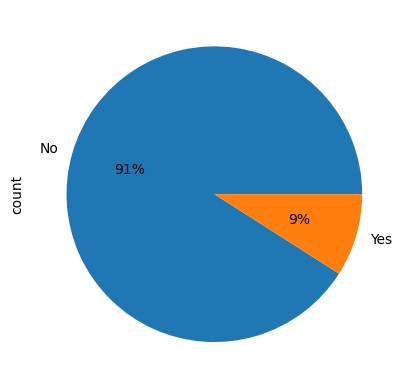

9% of people suffer from Heart Disease


In [127]:
df['HeartDisease'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

print ("9% of people suffer from Heart Disease")

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [128]:
categorical_features = df.select_dtypes(exclude='number')
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

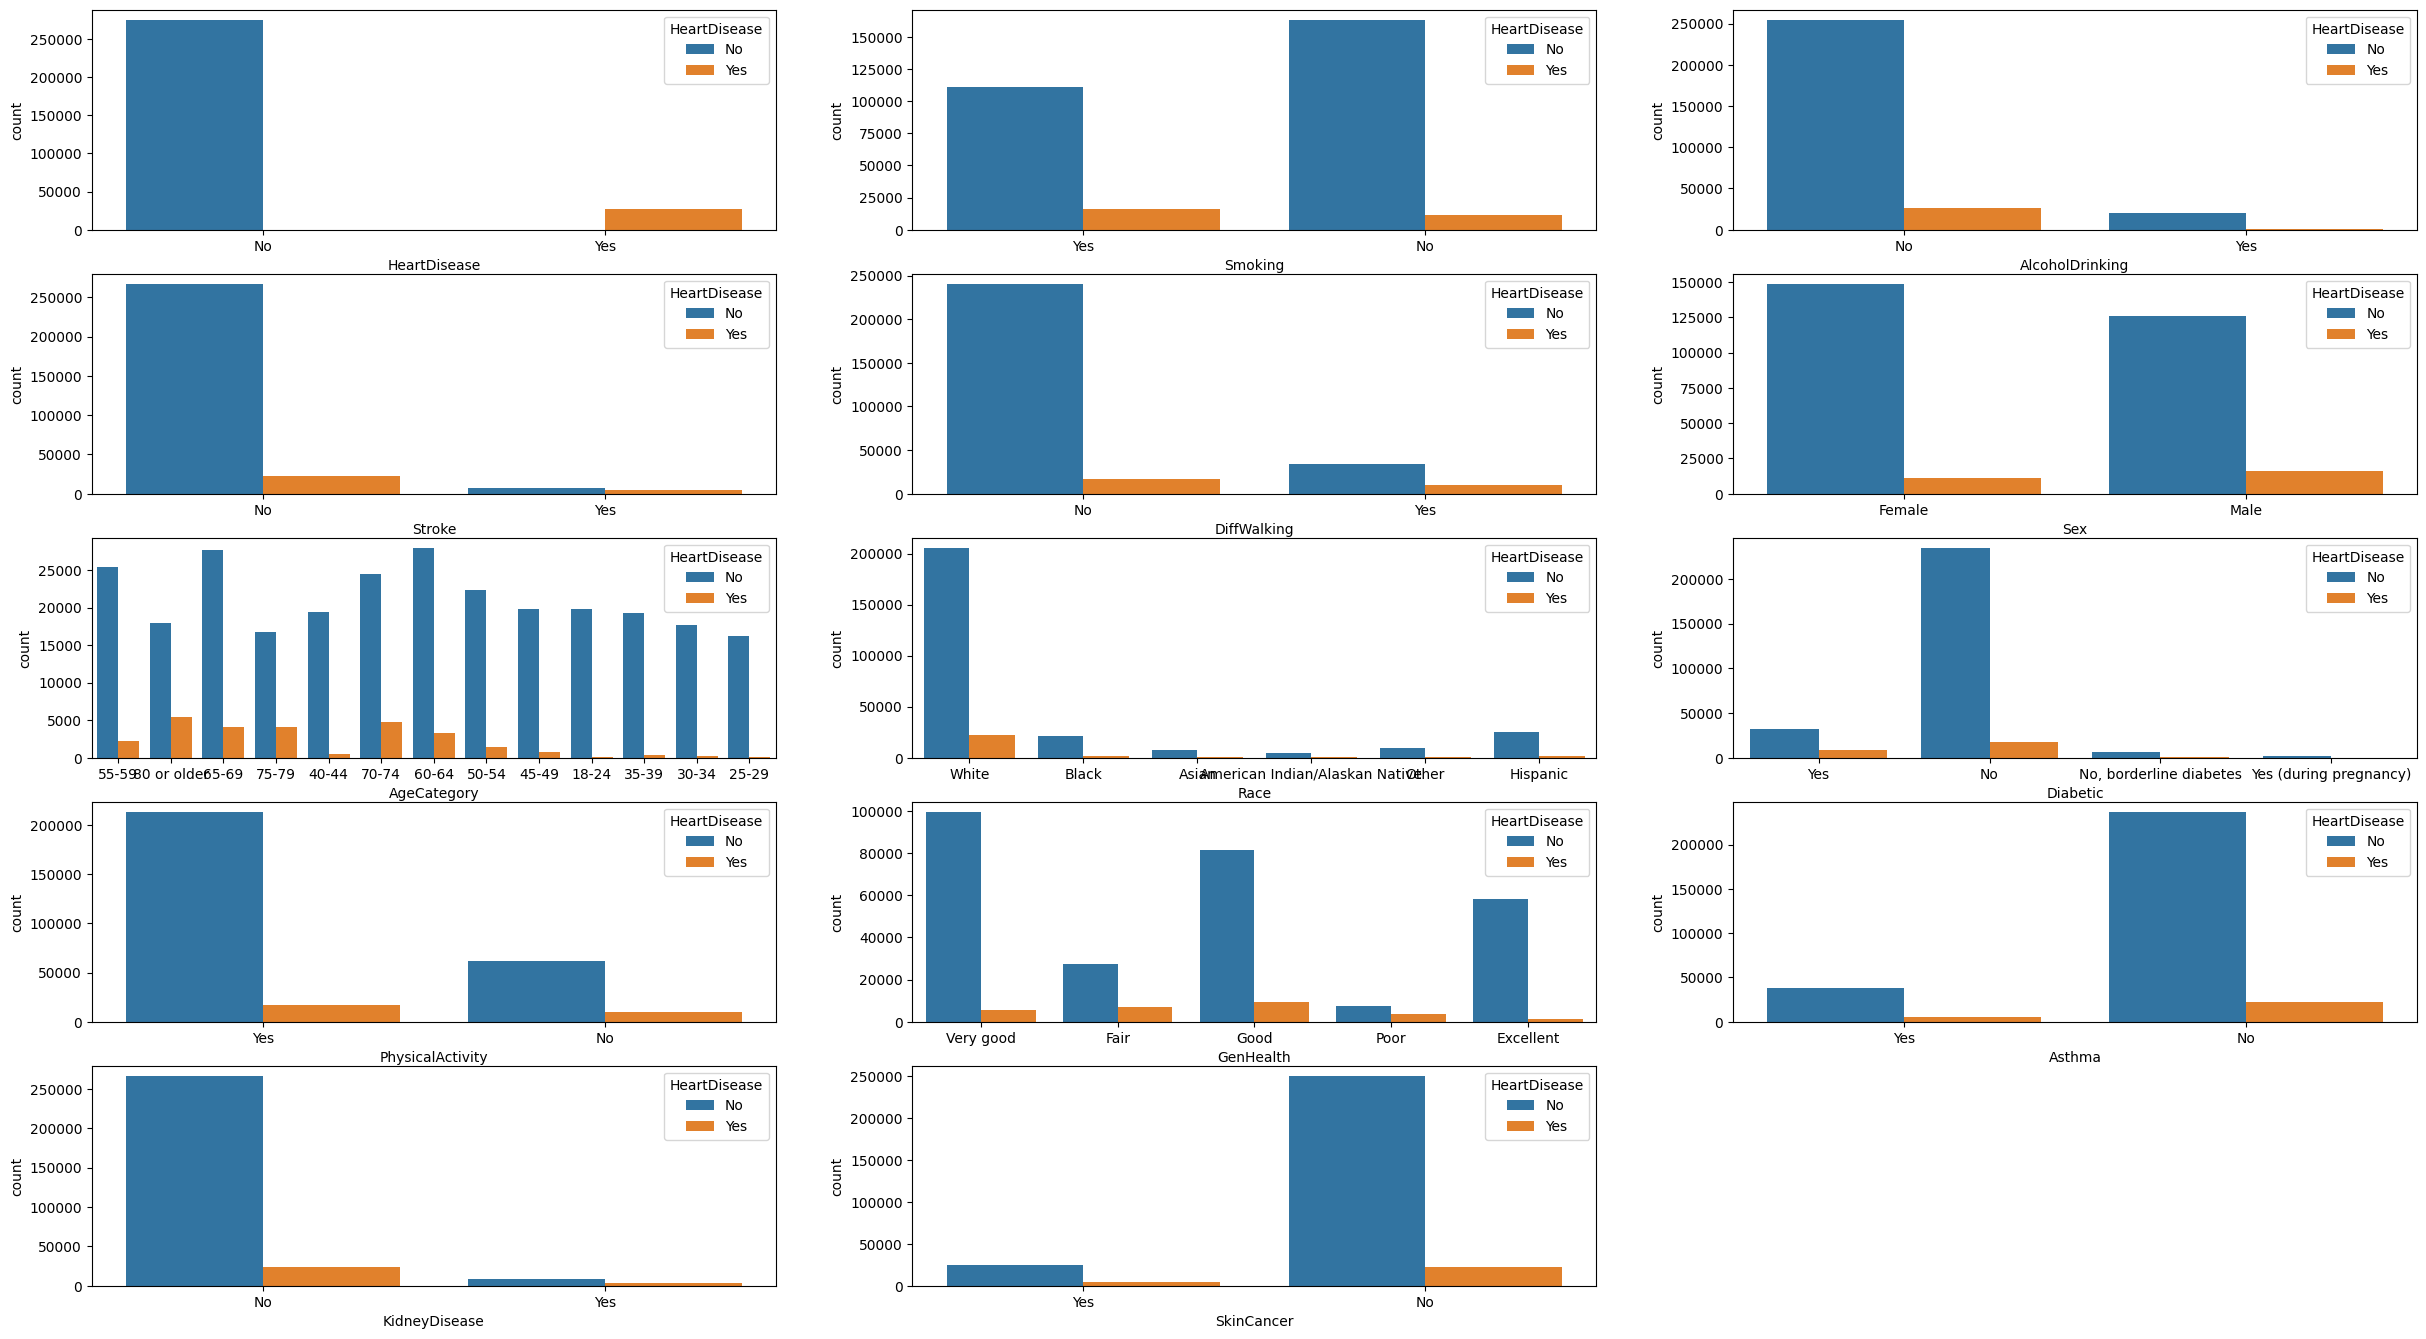

In [129]:
i=1
plt.figure(figsize = (30,20))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'HeartDisease' , data = df)
    i+=1

Below description from above charts as r, c:
0, 0 : Heart Disease: Showing bar graph for people having Heart Disease Vs Non Heart Disease.
0, 1 : Smoking: Seems like smokers have more Heart Disease, as compared to Non-Smokers.
0, 2 : Alcohol: Alcohol drinkers have higher chances of Heart Disease. Based on size of data.
1, 0 : Stroke: Chances of Stroke is higher for people with Heart Disease.
1, 1 : Diff-Walking: Lesser people with Diff-walking, but increased risk of Heart Disease.
1, 2 : Sex: Sample data of Female is more, but as per data, male are increased risk of Heart Disease.
2, 0 : AgeGroups: Heart Diseases is more prominent in age groups: 80+, 70~74,65-69,75-79,60-64.
2, 1 : Places: Inconcusive as gaps are high.
2, 2 : Diabetic: Diabetic more prone to Heart Disease, even Borderline are prone to Heart disease.
3, 0 : Physical Activity: As evident, more people are physically active; but people not physically active are more with Heart Disease.
3, 1 : Good Health: More people are in "Good Health" category. People with Poor and faire are more with Heart Disease.
3, 2 : Asthama: Few People have Asthama, and nominally higher poeple are with Heart Disease.
4, 0 : Kidney Disease: Very few people are with Kidney Disease, and are found to be high numbers with Heart Diseaes.
4, 1 : Skin Cancer: No conclusion.



### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [130]:
#Check Categories in Diabetic:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [131]:
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)':'Yes','No, borderline diabetes':'No'})
df['Diabetic'].value_counts()

Diabetic
No     258572
Yes     43145
Name: count, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [132]:
df['HeartDisease'] = df['HeartDisease'].replace({'Yes':1,'No':0})
df['HeartDisease'].value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [133]:
object_type_variables = [i for i in df[['AgeCategory','Race','GenHealth']] if df.dtypes[i] == object]
object_type_variables 

le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)
df = pd.get_dummies(df,drop_first=True)
df.head(5)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,True,False,False,False,False,True,True,True,False,True
1,0,20.34,0.0,0.0,12,5,4,7.0,False,False,True,False,False,False,True,False,False,False
2,0,26.58,20.0,30.0,9,5,1,8.0,True,False,False,False,True,True,True,True,False,False
3,0,24.21,0.0,0.0,11,5,2,6.0,False,False,False,False,False,False,False,False,False,True
4,0,23.71,28.0,0.0,4,5,4,8.0,False,False,False,True,False,False,True,False,False,False


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [134]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(211201, 17) (90516, 17)
(211201,) (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [136]:
ss = StandardScaler()

X_train.iloc[:,:7] = ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = ss.transform(X_test.iloc[:,:7])
X_train.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
176022,-1.132899,-0.439473,-0.384657,-0.421066,0.513329,-1.467916,0.625112,True,False,False,False,False,False,True,False,False,False
209180,0.039479,-0.439473,-0.507567,1.252529,0.513329,-0.144421,-0.737100,False,False,False,False,True,True,True,False,False,False
167240,0.039479,-0.439473,-0.507567,0.694664,0.513329,-1.467916,0.625112,False,False,False,False,False,True,True,False,False,False
8444,-0.413099,-0.439473,0.106980,0.694664,0.513329,1.179074,0.625112,True,False,False,False,True,False,True,False,True,True
130663,-0.105716,-0.316708,-0.507567,0.136799,-0.298311,1.179074,-0.055994,True,False,False,False,True,True,True,False,False,False


In [137]:
X_test.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
284798,1.103733,-0.439473,-0.261748,0.694664,-1.921589,1.179074,0.625112,False,False,False,True,False,False,True,False,False,False
206219,-0.099538,-0.439473,-0.507567,1.252529,-1.921589,-0.144421,0.625112,False,False,False,False,True,True,True,True,False,False
298442,-0.410010,-0.193943,-0.261748,-0.142133,0.513329,1.179074,0.625112,False,False,False,False,False,False,True,False,False,False
119751,1.548588,-0.316708,-0.384657,-0.142133,-1.921589,-0.144421,1.987323,True,False,True,False,False,True,True,False,False,False
103309,-0.173680,-0.439473,-0.261748,-0.699998,-1.921589,1.179074,0.625112,False,False,False,False,False,False,True,False,False,False


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [154]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)   # fits the model with the train data
    pred = model.predict(X_test)  # makes predictions on the test set
    accuracy = accuracy_score(y_test, pred)
    return accuracy  # return all the metrics

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [155]:
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc], ['Logistic Regression','Naive Bayes','KNN','Decision tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

result

AttributeError: 'Flags' object has no attribute 'c_contiguous'

### Conclusion

----
## Happy Learning:)
----